# Welcome to week 3, bonus: Gradient Descent
<hr/>

So you're now proficient in linear regression - but, it feels like a lot of work. It's true; it's a bit messy. As well, we only know how to calculate it using one variable, and how often are we going to build a model that simply takes one variable to predict another? Unfortunately, data science tends to not be that easy. 

Luckily for us, there exists a popular new method to find linear relationships between one feature - or many - and an output. This method is the foundation for many popular algorithms used today, and is built on the same idea we just learned - minimizing error. 

## What is it?

Gradient descent is essentially an algorithmic (rather than formulaic) way to perform a linear regression. The idea of the algorithm is to feed in our data, point by point, repeatedly adjusting and improving our model. 

Where, in linear regression, we calculated the line of best fit by hand - solving for the slope and intercept - in gradient descent, **our algorithm is going to calculate these weights for us** - no huge formulas required.

## Breaking down the words

### Gradient

A gradient is really just another word for "derivative" - which returns us to the calculus problem. Luckily, there are intuitive ways to think about derivatives that will allow us to understand gradient descent, even without a deep knowledge of calculus.

A gradient, or derivative, is simply a rate of change. Derivative, gradient, slope, rate of change, rise over run; they're all calculating the same thing! Let's look at an example. You go to a convenience store to buy chips that cost 2 dollars. We can express this as a function:

>$y = 2x$

Where y represents the cost of our bill, and x is the number of chips we buy. We see that with each bag of chips we buy, our bill increases 2 dollars; therefore, our rate of change, or _derivative_, is 2 dollars! 

The difference between a derivative and normal $\frac{rise}{run}$ is that a derivative allows us to take very, very small and precise measurements of slope. We can't buy 0.001 bags of chips, so a visual representation will work best:

![derivative](http://www.sosmath.com/calculus/diff/der00/der00_3.gif)
[SOSMath](http://www.sosmath.com/calculus/diff/der00/der00.html)

You can see that as our "run" (the distance between the x values we're using to calculate our slope) shrinks, the derivative changes, until we can say something like, "What's the rate of change at $x=2$?"

So, let's tie this all together. A "gradient," or "derivative," is really just a measure of slope - how changing x affects y. The difference between this method, and our normal $\frac{rise}{run}$, is that it allows us to understand how y is changing at any given x value.

### Descent

The "Descent" part is how we're going to continuously update our model. Instead of explaining that, let's look at a parabola! (I'm going somewhere with this, I swear):

![parabola](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9e/Parabola.svg/220px-Parabola.svg.png)
(Wikipedia)

Given their round, open shape, parabolas bear a resemblance to bowls. They also have a nice big _minimum_- the bottom of the bowl. 

We also note that parabolas are quadratic functions, represented by functions similar to $y = x^2$. So, why am I telling you all of this? Well, we were looking at a quadratic function earlier.

> error = $(f(x) - y)^2$

Where _f(x)_ is our line of best fit, _x_ is the value we're calculating our error at, and _y_ is the observed value in our dataset. This _error_ function is also sometimes referred to as a _cost_ function, though they mean the same thing. 

Let's think back to the main concept behind linear regression - **minimizing our error**. Well, we know our error function, and we know we want to minimize it: how?

The short answer is, "calculus." That's not a very satisfying answer, though. As gradient descent is an algorithm, and not a formula, a lot of your understanding will come from the programming implementation below, so don't worry if you don't understand right now - keep reading. However, let's think about it intuitively before we jump right in. We know that our error function looks like the parabola above - not exactly like it, but it has the same shape. 

When we provide an $x$ value, we know that inside $f(x)$, we're going to have $x$ be multiplied by a slope, and have an intercept added: $f(x) = mx + b$. In linear regression, we're trying to find a slope that makes our $f(x)$ as accurate as possible. So, on our x-axis, we're going to have the various slopes we try.

Let's take a step back. On our y-axis, we have our total error. On our x-axis, we have whichever slope we're examining. So, in all, we're comparing **our slope versus our error**. We're asking: 

>"As we change the slope, how does the error change?"

Remember, we're trying to **minimize** our error. So, all we're doing is searching for the bottom of this parabola: we're looking for the slope that gives us the smallest error! 

### Warning: Lots of definitions upcoming

There are lots of conventions in data science that like to make the formulas look complicated and scary. The short response to that is, they aren't. We could continue using notation we're familiar with, but at some point, you're going to find that the sources you're learning from have migrated to this annoying new notation. For this reason, it's a good idea to get used to it here, with a gentle introduction.

If you simply can't bear it, then I recommend you do the following: Try your best to familiarize yourself with the first definition (slope), and then skip to the [Programming Gradient Descent](#Programming-Gradient-Descent) section of the workshop, and slowly read through the definitions as you find names you don't recognize in the code. Remember, only the names are unfamiliar to you - the concepts are exactly the same!

#### Slope is now Weight (or, $\theta$)

We tend to stop using the word "slope," instead using the word "weight." This makes sense: if we have an equation with many different variables, like $f(x, y, z) = 3x + 2x - 5z$ ... what's the slope? Are there three slopes?

This is why we begin to use the word "weight," or "weights" when we have more than one. You can think about a weight as a measure of how sensitive a variable is. With a really big weight (say, $10z$), the term is going to become much more important in the equation as z increases! That shares the idea of slope, and gives us a better way to express having more than one variable and slope. 

Our weights are simply how sensitive - or important - each variable is in our equation. As well, rather than using $m$, we now use $\theta$. <hr/>

#### Our model, f(x), is now $h_{\theta}(x)$

Another difference is that rather than _f(x)_, we write $h_{\theta}(x)$. Note that this is _no different_. At all. Both of these equations are simply referring to the line of best fit that our model is creating. If you're curious as to why we use "h", it's for "hypothesis;" our model is creating a "hypothesis" about what the output will be. "Prediction" also works here. Our new _f(x)_, then, is:

$h_{\theta}(x) = \theta \cdot x + b $

Just like $y = mx + b$! <hr/>

#### Our error function is now $J(\theta)$

We also tend to express our error function similarly, using $J(\theta)$. Why J? Well, my hypothesis _(groan)_ is that after $h$, $i$ was already taken (used for situations similar to for loops in computer science), so they moved on to $J$. We can use our notation to express our error as:

>$ J(\theta) = (h_{\theta}(x) - y)^2 $

Remember, this is the same notation as our old error! As a reminder: $error = (f(x) - y)^2$ <hr/>

## So, how does it work?

Gradient descent is inherently a lot more programming than it is math. So, let's jump in, and the algorithm will become clear. First, though, a visualization will give a helpful idea of what we're working towards.

![graddesc](https://raw.githubusercontent.com/mattnedrich/GradientDescentExample/master/gradient_descent_example.gif)
(mattnedrich on GitHub)


Watch the right hand side - that's what we're going to be implementing. We're going to be telling our line of best fit how to move towards the center of our data.

## Programming Gradient Descent
<hr/>

Let's start off by doing a really, realy simple - almost dumb - example. Let's grab the very first point in our dataset.

In [1]:
import pandas as pd #pandas as always
import numpy as np #numpy as always

#make our notebooks appear inline
%matplotlib inline 
from IPython.display import display #viewing dataframes
import matplotlib.pyplot as plt #matplotlib for graphs
from pandas.plotting import scatter_matrix #see relationships between our variables
from mpl_toolkits.mplot3d import Axes3D #surprise for later
plt.style.use('fivethirtyeight') #make our graphs look pretty

In [168]:
data = pd.read_csv('basketballdata.csv')

x = data['PD'][0]
y = data['Win_pct'][0]

display(x, y)

8.3000000000000007

0.66700000000000004

Alright, so we have a data point: $(8.3, 0.667)$. This belongs to the Golden State Warriors, one of the better teams the NBA has ever seen, but they're offer to a bit of a rocky start this year. They're still playing very well, outscoring their opponents by 8.3 points per game, and winning two-thirds of their games.

The (almost dumb) question we want to ask is:

>Knowing that the Warriors are scoring 8.3 points per game, can we "predict" their 0.667 win percentage?

Wait, what? We already know their win percentage; how can we predict it? Bear with me. What we're really asking here is this:

>What things can we do to $x$ (8.3) to achieve $y$ (0.667)?

Hopefully, that makes the question a little bit more clear (if not very open-ended). What does "things" mean? There are lots of "things" we can do in math. We can add, subtract, divide, multiply... 

Well, in our linear regression, we added (b) and multiplied (m), so let's stick to those operations. In fact, let's keep it very simple, and only use multiplication - as if we're doing $y=mx$. So, with $y=0.667$, and $x=8.3$, what value of $m$ will yield $y$? We'll call this our hypothesis (or estimate, or prediction). Let's try 1, and we'll use our error function to see how far off we are.

In [6]:
weight = 1

hypothesis = x * weight
error = (hypothesis - y) ** 2
print(error)

58.262689


Ouch! We're pretty far off. As we can see, $8.3\cdot 1$ in fact does not equal $0.667$. Okay, well, let's try something a little bit smaller. What about 0.5?

In [7]:
weight = 0.5

hypothesis = x * weight
error = (hypothesis - y) ** 2
print(error)

12.131289


Hey, that's better! $8.3\cdot 0.5$ still isn't $0.667$, but it's closer than we were before! Let's try it for a bunch of numbers now. We'll create a function called "predict" that simply multiplies $x$ by a weight. 0.5 seemed like it was getting closer, so if we just keep going all the way down to 0, I'm sure we'll get more accurate - right? 

In [173]:
def predict(x, weight):
    return x*weight

list_of_weights = [0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0]

for weight in list_of_weights:
    hypothesis = predict(x, weight)
    error = (hypothesis - y) ** 2
    print("Weight: ", str(weight)," Error: ",str(error))

Weight:  0.4  Error:  7.038409
Weight:  0.3  Error:  3.323329
Weight:  0.2  Error:  0.986049
Weight:  0.1  Error:  0.026569
Weight:  0.05  Error:  0.063504
Weight:  0.01  Error:  0.341056
Weight:  0  Error:  0.444889


Wait, what? It looked like things were going pretty well there - as we kept making our weight smaller, our error kept getting smaller. So why did it start getting bigger again? 

Remember, our error function is a **parabola**! It's a curve - so if you go too far past the minimum, it'll start coming back up! Let's see what this looks like:

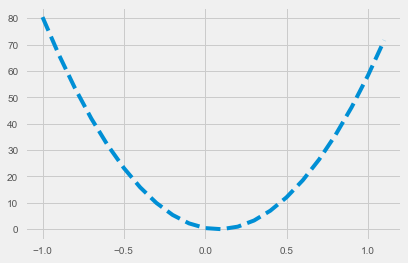

In [198]:
list_of_weights = [i/10 for i in range(-10, 10)] #this just creates a list of all tenths between [-1, 1]: -1, -0.9, ... 0.9, 1
list_of_errors = []

for weight in list_of_weights:
    hypothesis = predict(x, weight)
    error = (hypothesis - y) ** 2
    list_of_errors.append(error)
    
plt.plot(list_of_weights, list_of_errors, linestyle='dashed');

This poses an interesting problem. Seemingly, we can't just keep going further and further down to minimize our error. So how do we know when our weight is at the bottom of the curve? This is where gradient descent comes in. The algorithm, at heart, is telling our weight what direction it should go in - does it need to get bigger? Smaller? 

This idea starts to get into calculus. As usual, though, we don't need calculus to have an intuitive understanding of it. When we ask what direction our weight should go, we're really asking, what direction is the curve heading right now? Down? Up? 

It's cheesy, but imagine you're standing on $x = -0.5$. When you look left, you see the curve heading up. When you look right, you see the curve heading downwards. You know you're looking for the bottom of the curve, so you know you want to head **down the slope of the curve**.

>Note: You're probably thinking, "can't we just keep trying literally every possible weight until we find a really small error?" The answer is a function of how much you're willing to spend to replace your computer after it explodes.

Of course, we also need to know how far to go - standing at $x = -0.5$, we're still pretty far away from the bottom of the curve.

So how do we know both which direction, and how far, we need to go?

### How do we know where to go?

Let's think back to our error function (the curve), $J(\theta) = (h_{\theta}(x) - y)^2$. This is _squared error_. Remember that squared error is simply the _error_ (how much we missed by), _squared_. So if we were to write, say, $J(\theta) = (error)^2$, instead, that would still be correct. Let's play around with this idea a bit.

>Error is -5: $(-5)^2 = 25$ <br/>
>Error is 0: $(0)^2 = 0$ <br/>
>Error is 6: $(6)^2 = 36$

Okay, this is obvious. The _squared error_ is the _error, squared_. Got it. How does this help us? Well, we know that the error, before we square it, is really $h_{\theta}(x) - y$. And we know that $x=8.3$, and $y=0.667$. We can unravel this a bit further:

>$h_{\theta}(x) - y$ <br/>
>$h_{\theta}(8.3) - 0.667$ <br/>
>$\theta \cdot 8.3 - 0.667$

This is what we're really squaring.

>Error is -5: $(\theta \cdot 8.3 - 0.667)^2 = 25$ <br/>
>Error is 0: $(\theta \cdot 8.3 - 0.667)^2 = 0$ <br/>
>Error is 6: $(\theta \cdot 8.3 - 0.667)^2 = 36$

Clearly, as we get different values for our squared error (25, 0, 36...), it's $\theta \cdot 8.3 - 0.667$, or our **error** that's causing our change in squared error. So ... does this tell us both how far and in which direction to go?

>Error is -5: $(\theta \cdot 8.3 - 0.667) = -5$
>1. We know that because the sign is negative, that our value for $\theta$ is too low. This means we need to go forwards (right, on our graph).
>2. We know that our error has a value of 5. We want an error of 0. So, we're still pretty far off.

Seems like it qualifies! **Our error tells us both how far and in which direction to go**. So, if we update our weight with this value, it should get closer to the bottom of the curve! We're going to subtract it - we do this because when our error is _negative_, we know we need to go forwards, towards the _positive_ side of the graph. When our error is _positive_, we know we need to go backwards, towards the _negative_ numbers. So, essentially, we want to do the opposite of what our error tells us.

Let's finally get back to programming and implement this. We're going to choose a weight, and try to move it towards the bottom of the curve.

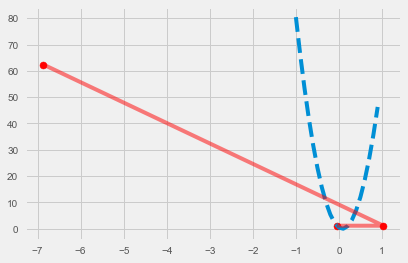

In [210]:
nice_parabola_weights = [i/10 for i in range(-10, 10)] #Create that nice error parabola 
nice_parabola_errors = []

'''
Here, we're just what we did above to make our error curve. You can ignore this.
'''

for weight in nice_parabola_weights:
    hypothesis = predict(x, weight)
    error = (hypothesis - y) ** 2
    nice_parabola_errors.append(error)
    
    
'''
Now, we're going to try to move our weight. We're going to give it five "guesses" to see how close it can get. 
We'll cheat a bit and start our weight off close to the bottom of the curve - but, we're going to make it negative.
Will it be able to recognize that it needs to move forward?
'''    

guesses = 2

weight = -0.05
list_of_weights = [weight]

list_of_errors = [(weight*x-y)**2]



for i in range(guesses):
    hypothesis = predict(x, weight)
    error = (hypothesis - y) ** 2
    list_of_errors.append(error)
    weight = weight - (hypothesis - y) #Update our weight using the absolute error
    list_of_weights.append(weight)
    
plt.plot(nice_parabola_weights, nice_parabola_errors, linestyle="dashed");
plt.scatter(list_of_weights, list_of_errors, color='r');
plt.plot(list_of_weights, list_of_errors, color='r',  alpha=0.5, linestyle="solid");

Woah! What happened? It looks like... It started off near the bottom, and then it flew out towards 1. Well, it went in the right direction! It just went way too far. 

Then, from 1, it went... all the way back to -7! Again, it went in the right direction, but it was way, way too far.

This introduces us to the idea of **learning rate**. Right now, we've successfully managed to tell the weight which direction it should head, but it's clearly much too eager to do so. It's learned where to go, but it's learning too quickly! We need a way to slow it down a bit. 

The _learning rate_ is a tool we use to scale how quickly our weight will adjust itself. Sure, if you let it buzz around like that for long enough, maybe it'll land on the bottom of the curve eventually - but that'll mostly be by accident. We want it to slowly, smoothly move towards the bottom, and to do that, we have to slow it down. 

To do this, we have to slow down the point at which it's learning. That point is where the weights are being updated. So, if we just multiply this weight update by a really small number, maybe it'll do what we're asking! This really small number is generally represented by $\alpha$, or alpha.

First, though, let's organize our code; it's getting a bit messy. Let's throw our gradient descent code into a function.

In [216]:
def gradient_descent(x, y, weight, alpha, guesses):
    for i in range(guesses):
        hypothesis = predict(x, weight)
        error = (hypothesis - y) ** 2
        list_of_errors.append(error)
        weight = weight - alpha*(hypothesis - y) #Scale our weight by alpha
        list_of_weights.append(weight)    
    plt.plot(nice_parabola_weights, nice_parabola_errors, linestyle="dashed");
    plt.scatter(list_of_weights, list_of_errors, color='r');
    plt.plot(list_of_weights, list_of_errors, color='r',  alpha=0.5, linestyle="solid");

Now let's set alpha at something reasonable to start. We'll use 0.25 - that means it will learn 4 times slower than before (as 0.25 is the same as dividing by 4). Let's also move our weight back a little bit to make it harder to guess, and really put our code to the test.

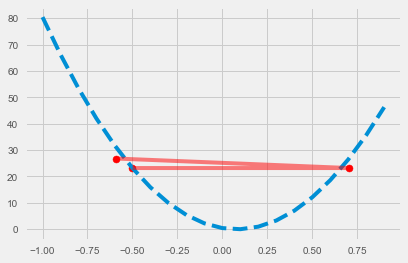

In [219]:
guesses = 2
alpha = 0.25
weight = -0.5

list_of_weights = [weight]
list_of_errors = [(weight*x-y)**2]

gradient_descent(x, y, weight, alpha, guesses)

Okay, that got a little bit better, but if you Look at it, it's going to keep bouncing around. It's still learning too quickly. Let's see what that looks like by adding more guesses.

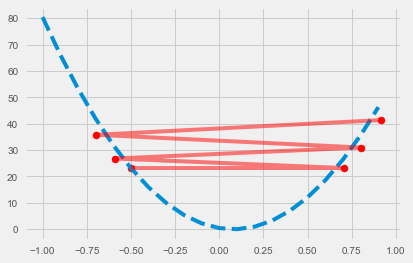

In [220]:
guesses = 5
alpha = 0.25
weight = -0.5

list_of_weights = [weight]
list_of_errors = [(weight*x-y)**2]

gradient_descent(x, y, weight, alpha, guesses)

Just as we figured. Clearly, even with a learning rate of 0.25, it's still learning too quickly. Okay, fine; if it wants to learn slowly, let's show it slowly. Try third grade on for size:

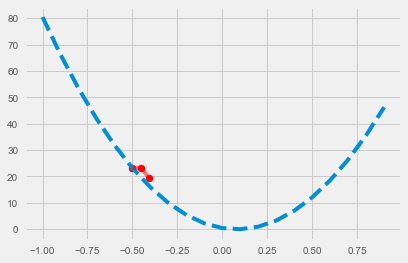

In [229]:
guesses = 2
alpha = 0.01
weight = -0.5

list_of_weights = [weight]
list_of_errors = [(weight*x-y)**2]

gradient_descent(x, y, weight, alpha, guesses)

What's happening now? It's still going in the right direction, but it's moving way too slowly. Well, that means it'll get there eventually, right? Let's just give it more gueses!

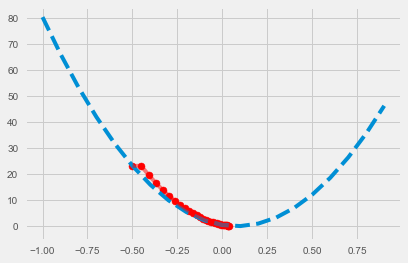

In [235]:
guesses = 30
alpha = 0.01
weight = -0.5

list_of_weights = [weight]
list_of_errors = [(weight*x-y)**2]

gradient_descent(x, y, weight, alpha, guesses)

Well, we finally did it! We made our weight find its way to the bottom of the curve. Except... we cheated. Maybe right now we can decide to give it more guesses, but when we run much more complex algorithms, we won't be able to let it keep trying over and over again - it has to get there quickly, before our computer explodes. 

Why don't we only give it a few guesses, and instead, we fine-tune our learning rate just a little bit more?

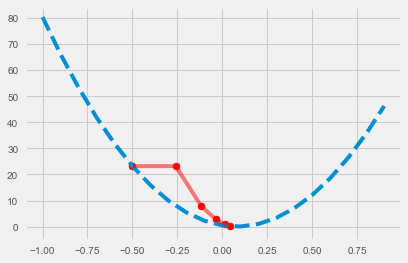

In [238]:
guesses = 5
alpha = 0.05
weight = -0.5

list_of_weights = [weight]
list_of_errors = [(weight*x-y)**2]

gradient_descent(x, y, weight, alpha, guesses)

Look at that! It zoomed right there. Isn't that a lot quicker than giving it so many guesses your computer explodes?

That teaches us an important lesson, though; **given a small enough alpha, and enough guesses, gradient descent will eventually find the minimum**. In other words, if you give me enough time, I can successfully crawl from Toronto to New York. The problem is that it's extremely painful, and gravel doesn't taste very good. So, we try to find a happy medium between cost and speed (and end up taking the bus). 

Adding in the intercept

y = -0.28415 x  + 0.71585
y = -0.16867025 x  + 0.83132975
y = -0.10688858375 x  + 0.89311141625
y = -0.0738353923062 x  + 0.926164607694
y = -0.0561519348838 x  + 0.943848065116
y = -0.0466912851629 x  + 0.953308714837
y = -0.0416298375621 x  + 0.958370162438
y = -0.0389219630957 x  + 0.961078036904
y = -0.0374732502562 x  + 0.962526749744
y = -0.0366981888871 x  + 0.963301811113


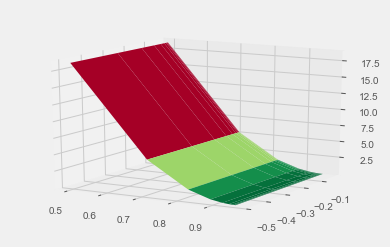

In [239]:
def basic_gradient_descent(x, y, iterations=10):
    x = [1, x]
    weights = [0.5, -0.5]
    alpha = 0.05
    
    weight_history = np.empty(2)
    error_history = []
    for i in range(iterations):
        hypothesis = np.sum(np.dot(x, weights))
        error = (hypothesis - y) ** 2
        
        error_history.append(error)
        weight_history = np.vstack([weight_history, weights])
        
        for i in range(len(weights)):
            weights[i] -= alpha*(hypothesis-y) 
            
        print("y =", str(weights[1]),"x", " +", str(weights[0]))
    return weights, weight_history[1:], error_history
        
weights, weight_history, error_history = basic_gradient_descent(x, y, iterations=10)

def plot_error(weight_history, error_history, elev=15, azim=300):
    plotx, ploty = np.meshgrid(weight_history[:,0], weight_history[:,1])

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(plotx, ploty, error_history, cmap='RdYlGn_r')
    ax.view_init(elev=elev, azim=azim)
    
plot_error(weight_history, error_history)

Plot y=mx + b changes here

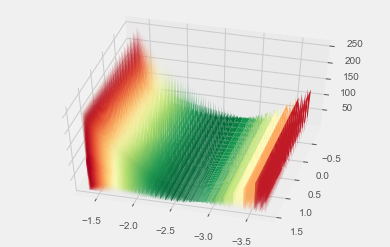

In [240]:
def basic_gradient_descent(x, y, iterations=10):
    x = [[1, i] for i in x]
    weights = [-3.7, -0.85] #(np.random.sample(2)+np.random.randint(-20,20,2)).tolist()
    alpha = 0.001
    
    weight_history = np.empty(2)
    error_history = []
    for i in range(iterations):
        for j in range(len(x)):
            hypothesis = np.sum(np.dot(x[j], weights))
            error = (hypothesis - y[j]) ** 2

            error_history.append(error)
            weight_history = np.vstack([weight_history, weights])

            for k in range(len(weights)):
                weights[k] -= alpha*(hypothesis-y[j]) 
            #print("y =", str(weights[1]),"x", " +", str(weights[0]))
    return weights, weight_history[1:], error_history
        
weights, weight_history, error_history = basic_gradient_descent(pred['PD'], pred['Win_pct'], iterations=100)
#print(error_history)
plot_error(weight_history, error_history, elev=50, azim=105)

In [14]:
def compute_hypothesis(x, weights):
    return np.sum(np.dot(x, weights))

def compute_error(hypothesis, y):
    return (hypothesis-y)**2

def update_weights(weights, alpha, hypothesis, y):
    for i in range(len(weights)):
        weights[i] -= alpha*(hypothesis-y)
    return weights

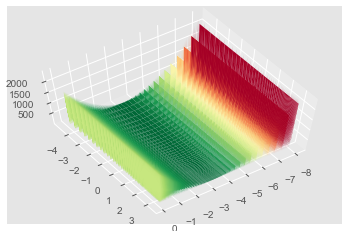

In [15]:
def gradient_descent(x, y, weights, alpha=0.001, iterations=100, elev=50, azim=105):
    x = [[1, i] for i in x]
    
    weight_history = np.empty(2)
    error_history = []
    for i in range(iterations):
        for j in range(len(x)):
            hypothesis = np.sum(np.dot(x[j], weights))
            error_history.append(compute_error(hypothesis, y[j]))
            weights = update_weights(weights, alpha, hypothesis, y[j])
            weight_history = np.vstack([weight_history, weights])
    weight_history = weight_history[1:]
    plot_error(weight_history, error_history, elev=elev, azim=azim)
    return weights, weight_history, error_history
        
#random_weights = (np.random.sample(2)+np.random.randint(-10,10,2)).tolist()

x = pred['PD']
y = pred['Win_pct']
input_weights = [-8.01, -4.6]
weights, weight_history, error_history = gradient_descent(x, y, input_weights, iterations=300, alpha=0.0003, elev=65, azim=55)

Completed after  300  iterations


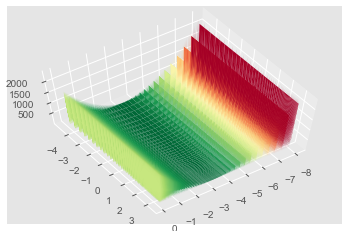

In [16]:
def gradient_descent(x, y, weights, alpha=0.001, iterations=100, threshold=1, elev=50, azim=105):
    x = [[1, i] for i in x]
    
    weight_history = np.empty(2)
    error_history = []
    i = 0
    while True:
        for j in range(len(x)):
            hypothesis = np.sum(np.dot(x[j], weights))
            error_history.append(compute_error(hypothesis, y[j]))
            weights = update_weights(weights, alpha, hypothesis, y[j])
            weight_history = np.vstack([weight_history, weights])
        i += 1
        if i == iterations or error_history[-1] < threshold and i > iterations // 4:
            break
    print("Completed after ",str(i)," iterations")
    weight_history = weight_history[1:]
    plot_error(weight_history, error_history, elev=elev, azim=azim)
    return weights, weight_history, error_history
        
#random_weights = (np.random.sample(2)+np.random.randint(-10,10,2)).tolist()

x = pred['PD']
y = pred['Win_pct']
input_weights = [-8.01, -4.6]
weights, weight_history, error_history = gradient_descent(x, y, input_weights, iterations=300, alpha=0.0003, elev=65, azim=55)

# BREAK
<hr/>

In [121]:
#test = data[['O3PM', 'OFG_pct', 'DREB_Pct']]

def feature_normalization(x):
    for feature in x:
        x[feature] = (x[feature]-np.mean(x[feature]))/(np.max(x[feature]) - np.min(x[feature]))
    return x

In [112]:
def update_weights(weights, alpha, hypothesis, y):
    return weights - alpha*(hypothesis-y)

Completed after  127  iterations
[0.023121431715321966, 0.0012391956360981431, 0.00059331621172192372]
[ 0.49358958  0.48729521 -0.22807371]


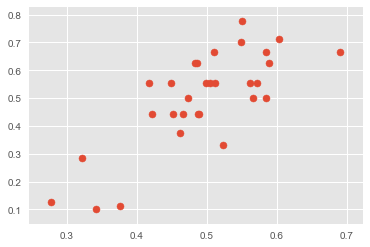

In [138]:
x = data[['PF', 'PA']]
x = feature_normalization(x.copy())
y = data['Win_pct']
features = len(x.loc[0])+1

def multiple_gradient_descent(x, y, weights, alpha=0.001, iterations=100, threshold=1):
    x.insert(0, 'X0', 1)
    
    weight_history = np.empty(len(x.loc[0]))+1
    error_history = []
    i = 0
    flag = True
    while flag:
        for j in range(len(x)):
            hypothesis = np.sum(np.dot(x.loc[j], weights))
            error_history.append(compute_error(hypothesis, y[j]))
            weights = update_weights(weights, alpha, hypothesis, y[j])
            weight_history = np.concatenate([weight_history, weights], axis=0)
            if error_history[-1] < threshold and i > iterations // 4:
                flag = False
                break
        i += 1
        if i == iterations:
            flag = False
    print("Completed after ",str(i)," iterations")
    weight_history = weight_history[1:]
    return weights, weight_history, error_history

weights = (np.random.sample(features)-np.random.sample(features)).tolist()
weights, weight_history, error_history = multiple_gradient_descent(x, y, weights, iterations=500, alpha=0.001, threshold=0.001)

print(error_history[-3:])
print(weights)

hypotheses = [compute_hypothesis(weights, x.loc[i].tolist()) for i in range(len(x))]
plt.scatter(hypotheses, y)

In [139]:
test = data.copy()
test.insert(3, 'xW%', hypotheses)
test


,TEAM,GP,Win_pct,xW%,PD,PF,PA,FG_pct,OFG_pct,3PM,3PA,3P_pct,O3PM,O3PA,O3P_pct,AST_TO,OREB_pct,DREB_Pct,PACE
0,Golden State,9,0.667,0.691315,8.3,120.0,111.7,0.523,0.446,13.4,32.9,0.409,11.3,30.7,0.370,1.79,0.251,0.733,103.33
1,Brooklyn,9,0.333,0.523785,-5.0,114.3,119.3,0.436,0.474,11.2,33.0,0.340,10.3,26.9,0.384,1.40,0.219,0.766,109.26
2,Washington,8,0.500,0.584943,2.6,113.5,110.9,0.461,0.477,10.0,27.5,0.364,9.6,27.8,0.347,1.65,0.247,0.759,103.22
3,Indiana,9,0.556,0.561723,2.1,111.3,109.2,0.481,0.475,9.6,25.2,0.379,10.0,27.0,0.370,1.58,0.232,0.761,103.36
4,Orlando,9,0.667,0.584978,4.7,111.3,106.6,0.480,0.447,12.4,29.6,0.421,8.4,27.6,0.306,1.53,0.188,0.754,104.66
5,Toronto,8,0.625,0.588505,7.0,109.3,102.3,0.465,0.453,10.1,32.3,0.314,8.8,25.8,0.340,1.53,0.222,0.778,101.52
6,LA Clippers,7,0.714,0.602943,8.9,109.0,100.1,0.453,0.430,11.6,29.6,0.391,9.4,27.4,0.344,1.45,0.263,0.771,100.16
7,Minnesota,8,0.625,0.483177,-4.3,108.8,113.1,0.467,0.508,8.5,22.8,0.374,9.5,27.0,0.352,1.35,0.251,0.744,100.84
8,Cleveland,9,0.444,0.466605,-5.2,107.8,113.0,0.476,0.477,10.2,29.9,0.342,13.7,32.9,0.416,1.32,0.200,0.781,100.85
9,Philadelphia,9,0.556,0.504213,-0.9,107.7,108.6,0.460,0.443,12.3,31.2,0.395,10.6,33.6,0.315,1.47,0.242,0.788,104.63


In [ ]:
# Welcome to week 3, bonus: Gradient Descent
<hr/>

So you're now proficient in linear regression - but, it feels like a lot of work. It's true; it's a bit messy. As well, we only know how to calculate it using one variable, and how often are we going to build a model that simply takes one variable to predict another? Unfortunately, data science tends to not be that easy. 

Luckily for us, there exists a popular new method to find linear relationships between one feature - or many - and an output. This method is the foundation for many popular algorithms used today, and is built on the same idea we just learned - minimizing error. 

## What is it?

Gradient descent is essentially an algorithmic (rather than formulaic) way to perform a linear regression. The idea of the algorithm is to feed in our data, point by point, repeatedly adjusting and improving our model. 

Where, in linear regression, we calculated the line of best fit by hand - solving for the slope and intercept - in gradient descent, **our algorithm is going to calculate these weights for us** - no huge formulas required.

## Breaking down the words

### Gradient

A gradient is really just another word for "derivative" - which returns us to the calculus problem. Luckily, there are intuitive ways to think about derivatives that will allow us to understand gradient descent, even without a deep knowledge of calculus.

A gradient, or derivative, is simply a rate of change. Derivative, gradient, slope, rate of change, rise over run; they're all calculating the same thing! Let's look at an example. You go to a convenience store to buy chips that cost 2 dollars. We can express this as a function:

>$y = 2x$

Where y represents the cost of our bill, and x is the number of chips we buy. We see that with each bag of chips we buy, our bill increases 2 dollars; therefore, our rate of change, or _derivative_, is 2 dollars! 

The difference between a derivative and normal $\frac{rise}{run}$ is that a derivative allows us to take very, very small and precise measurements of slope. We can't buy 0.001 bags of chips, so a visual representation will work best:

![derivative](http://www.sosmath.com/calculus/diff/der00/der00_3.gif)
[SOSMath](http://www.sosmath.com/calculus/diff/der00/der00.html)

You can see that as our "run" (the distance between the x values we're using to calculate our slope) shrinks, the derivative changes, until we can say something like, "What's the rate of change at $x=2$?"

So, let's tie this all together. A "gradient," or "derivative," is really just a measure of slope - how changing x affects y. The difference between this method, and our normal $\frac{rise}{run}$, is that it allows us to understand how y is changing at any given x value.

### Descent

The "Descent" part is how we're going to continuously update our model. Instead of explaining that, let's look at a parabola! (I'm going somewhere with this, I swear):

![parabola](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9e/Parabola.svg/220px-Parabola.svg.png)
(Wikipedia)

Given their round, open shape, parabolas bear a resemblance to bowls. They also have a nice big _minimum_- the bottom of the bowl. 

We also note that parabolas are quadratic functions, represented by functions similar to $y = x^2$. So, why am I telling you all of this? Well, we were looking at a quadratic function earlier.

> error = $(f(x) - y)^2$

Where _f(x)_ is our line of best fit, _x_ is the value we're calculating our error at, and _y_ is the observed value in our dataset. This _error_ function is also sometimes referred to as a _cost_ function, though they mean the same thing. 

Let's think back to the main concept behind linear regression - **minimizing our error**. Well, we know our error function, and we know we want to minimize it: how?

The short answer is, "calculus." That's not a very satisfying answer, though. As gradient descent is an algorithm, and not a formula, a lot of your understanding will come from the programming implementation below, so don't worry if you don't understand right now - keep reading. However, let's think about it intuitively before we jump right in. We know that our error function looks like the parabola above - not exactly like it, but it has the same shape. 

When we provide an $x$ value, we know that inside $f(x)$, we're going to have $x$ be multiplied by a slope, and have an intercept added: $f(x) = mx + b$. In linear regression, we're trying to find a slope that makes our $f(x)$ as accurate as possible. So, on our x-axis, we're going to have the various slopes we try.

Let's take a step back. On our y-axis, we have our total error. On our x-axis, we have whichever slope we're examining. So, in all, we're comparing **our slope versus our error**. We're asking: 

>"As we change the slope, how does the error change?"

Remember, we're trying to **minimize** our error. So, all we're doing is searching for the bottom of this parabola: we're looking for the slope that gives us the smallest error! 

### Warning: Lots of definitions upcoming

There are lots of conventions in data science that like to make the formulas look complicated and scary. The short response to that is, they aren't. We could continue using notation we're familiar with, but at some point, you're going to find that the sources you're learning from have migrated to this annoying new notation. For this reason, it's a good idea to get used to it here, with a gentle introduction.

If you simply can't bear it, then I recommend you do the following: Try your best to familiarize yourself with the first definition (slope), and then skip to the [Programming Gradient Descent](#Programming-Gradient-Descent) section of the workshop, and slowly read through the definitions as you find names you don't recognize in the code. Remember, only the names are unfamiliar to you - the concepts are exactly the same!

#### Slope is now Weight (or, $\theta$)

We tend to stop using the word "slope," instead using the word "weight." This makes sense: if we have an equation with many different variables, like $f(x, y, z) = 3x + 2x - 5z$ ... what's the slope? Are there three slopes?

This is why we begin to use the word "weight," or "weights" when we have more than one. You can think about a weight as a measure of how sensitive a variable is. With a really big weight (say, $10z$), the term is going to become much more important in the equation as z increases! That shares the idea of slope, and gives us a better way to express having more than one variable and slope. 

Our weights are simply how sensitive - or important - each variable is in our equation. As well, rather than using $m$, we now use $\theta$. <hr/>

#### Our model, f(x), is now $h_{\theta}(x)$

Another difference is that rather than _f(x)_, we write $h_{\theta}(x)$. Note that this is _no different_. At all. Both of these equations are simply referring to the line of best fit that our model is creating. If you're curious as to why we use "h", it's for "hypothesis;" our model is creating a "hypothesis" about what the output will be. "Prediction" also works here. Our new _f(x)_, then, is:

$h_{\theta}(x) = \theta \cdot x + b $

Just like $y = mx + b$! <hr/>

#### Our error function is now $J(\theta)$

We also tend to express our error function similarly, using $J(\theta)$. Why J? Well, my hypothesis _(groan)_ is that after $h$, $i$ was already taken (used for situations similar to for loops in computer science), so they moved on to $J$. We can use our notation to express our error as:

>$ J(\theta) = (h_{\theta}(x) - y)^2 $

Remember, this is the same notation as our old error! As a reminder: $error = (f(x) - y)^2$ <hr/>

## So, how does it work?

Gradient descent is inherently a lot more programming than it is math. So, let's jump in, and the algorithm will become clear. First, though, a visualization will give a helpful idea of what we're working towards.

![graddesc](https://raw.githubusercontent.com/mattnedrich/GradientDescentExample/master/gradient_descent_example.gif)
(mattnedrich on GitHub)


Watch the right hand side - that's what we're going to be implementing. We're going to be telling our line of best fit how to move towards the center of our data.

## Programming Gradient Descent
<hr/>

Let's start off by doing a really, realy simple - almost dumb - example. Let's grab the very first point in our dataset.

x = data['PD'][0]
y = data['Win_pct'][0]

display(x, y)

Alright, so we have a data point: $(8.3, 0.667)$. This belongs to the Golden State Warriors, one of the better teams the NBA has ever seen, but they're offer to a bit of a rocky start this year. They're still playing very well, outscoring their opponents by 8.3 points per game, and winning two-thirds of their games.

The (almost dumb) question we want to ask is:

>Knowing that the Warriors are scoring 8.3 points per game, can we "predict" their 0.667 win percentage?

Wait, what? We already know their win percentage; how can we predict it? Bear with me. What we're really asking here is this:

>What things can we do to $x$ (8.3) to achieve $y$ (0.667)?

Hopefully, that makes the question a little bit more clear (if not very open-ended). What does "things" mean? There are lots of "things" we can do in math. We can add, subtract, divide, multiply... 

Well, in our linear regression, we added (b) and multiplied (m), so let's stick to those operations. In fact, let's keep it very simple, and only use multiplication - as if we're doing $y=mx$. So, with $y=0.667$, and $x=8.3$, what value of $m$ will yield $y$? We'll call this our hypothesis (or estimate, or prediction). Let's try 1, and we'll use our error function to see how far off we are.

weight = 1

hypothesis = x * weight
error = (hypothesis - y) ** 2
print(error)

Ouch! We're pretty far off. As we can see, $8.3\cdot 1$ in fact does not equal $0.667$. Okay, well, let's try something a little bit smaller. What about 0.5?

weight = 0.5

hypothesis = x * weight
error = (hypothesis - y) ** 2
print(error)

Hey, that's better! $8.3\cdot 0.5$ still isn't $0.667$, but it's closer than we were before! Let's try it for a bunch of numbers now. We'll create a function called "predict" that simply multiplies $x$ by a weight. 0.5 seemed like it was getting closer, so if we just keep going all the way down to 0, I'm sure we'll get more accurate - right? 

def predict(x, weight):
    return x*weight

list_of_weights = [0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0]

for weight in list_of_weights:
    hypothesis = predict(x, weight)
    error = (hypothesis - y) ** 2
    print("Weight: ", str(weight)," Error: ",str(error))

Wait, what? It looked like things were going pretty well there - as we kept making our weight smaller, our error kept getting smaller. So why did it start getting bigger again? 

Remember, our error function is a **parabola**! It's a curve - so if you go too far past the minimum, it'll start coming back up! Let's see what this looks like:

list_of_weights = [i/10 for i in range(-10, 10)] #this just creates a list of all tenths between [-1, 1]: -1, -0.9, ... 0.9, 1
list_of_errors = []

for weight in list_of_weights:
    hypothesis = predict(x, weight)
    error = (hypothesis - y) ** 2
    list_of_errors.append(error)
    
plt.plot(list_of_weights, list_of_errors, linestyle='dashed');

This poses an interesting problem. Seemingly, we can't just keep going further and further down to minimize our error. So how do we know when our weight is at the bottom of the curve? This is where gradient descent comes in. The algorithm, at heart, is telling our weight what direction it should go in - does it need to get bigger? Smaller? 

This idea starts to get into calculus. As usual, though, we don't need calculus to have an intuitive understanding of it. When we ask what direction our weight should go, we're really asking, what direction is the curve heading right now? Down? Up? 

It's cheesy, but imagine you're standing on $x = -0.5$. When you look left, you see the curve heading up. When you look right, you see the curve heading downwards. You know you're looking for the bottom of the curve, so you know you want to head **down the slope of the curve**.

>Note: You're probably thinking, "can't we just keep trying literally every possible weight until we find a really small error?" The answer is a function of how much you're willing to spend to replace your computer after it explodes.

Of course, we also need to know how far to go - standing at $x = -0.5$, we're still pretty far away from the bottom of the curve.

So how do we know both which direction, and how far, we need to go?

### How do we know where to go?

Let's think back to our error function (the curve), $J(\theta) = (h_{\theta}(x) - y)^2$. This is _squared error_. Remember that squared error is simply the _error_ (how much we missed by), _squared_. So if we were to write, say, $J(\theta) = (error)^2$, instead, that would still be correct. Let's play around with this idea a bit.

>Error is -5: $(-5)^2 = 25$ <br/>
>Error is 0: $(0)^2 = 0$ <br/>
>Error is 6: $(6)^2 = 36$

Okay, this is obvious. The _squared error_ is the _error, squared_. Got it. How does this help us? Well, we know that the error, before we square it, is really $h_{\theta}(x) - y$. And we know that $x=8.3$, and $y=0.667$. We can unravel this a bit further:

>$h_{\theta}(x) - y$ <br/>
>$h_{\theta}(8.3) - 0.667$ <br/>
>$\theta \cdot 8.3 - 0.667$

This is what we're really squaring.

>Error is -5: $(\theta \cdot 8.3 - 0.667)^2 = 25$ <br/>
>Error is 0: $(\theta \cdot 8.3 - 0.667)^2 = 0$ <br/>
>Error is 6: $(\theta \cdot 8.3 - 0.667)^2 = 36$

Clearly, as we get different values for our squared error (25, 0, 36...), it's $\theta \cdot 8.3 - 0.667$, or our **error** that's causing our change in squared error. So ... does this tell us both how far and in which direction to go?

>Error is -5: $(\theta \cdot 8.3 - 0.667) = -5$
>1. We know that because the sign is negative, that our value for $\theta$ is too low. This means we need to go forwards (right, on our graph).
>2. We know that our error has a value of 5. We want an error of 0. So, we're still pretty far off.

Seems like it qualifies! **Our error tells us both how far and in which direction to go**. So, if we update our weight with this value, it should get closer to the bottom of the curve! We're going to subtract it - we do this because when our error is _negative_, we know we need to go forwards, towards the _positive_ side of the graph. When our error is _positive_, we know we need to go backwards, towards the _negative_ numbers. So, essentially, we want to do the opposite of what our error tells us.

Let's finally get back to programming and implement this. We're going to choose a weight, and try to move it towards the bottom of the curve.

nice_parabola_weights = [i/10 for i in range(-10, 10)] #Create that nice error parabola 
nice_parabola_errors = []

'''
Here, we're just what we did above to make our error curve. You can ignore this.
'''

for weight in nice_parabola_weights:
    hypothesis = predict(x, weight)
    error = (hypothesis - y) ** 2
    nice_parabola_errors.append(error)
    
    
'''
Now, we're going to try to move our weight. We're going to give it five "guesses" to see how close it can get. 
We'll cheat a bit and start our weight off close to the bottom of the curve - but, we're going to make it negative.
Will it be able to recognize that it needs to move forward?
'''    

guesses = 2

weight = -0.05
list_of_weights = [weight]

list_of_errors = [(weight*x-y)**2]



for i in range(guesses):
    hypothesis = predict(x, weight)
    error = (hypothesis - y) ** 2
    list_of_errors.append(error)
    weight = weight - (hypothesis - y) #Update our weight using the absolute error
    list_of_weights.append(weight)
    
plt.plot(nice_parabola_weights, nice_parabola_errors, linestyle="dashed");
plt.scatter(list_of_weights, list_of_errors, color='r');
plt.plot(list_of_weights, list_of_errors, color='r',  alpha=0.5, linestyle="solid");

Woah! What happened? It looks like... It started off near the bottom, and then it flew out towards 1. Well, it went in the right direction! It just went way too far. 

Then, from 1, it went... all the way back to -7! Again, it went in the right direction, but it was way, way too far.

This introduces us to the idea of **learning rate**. Right now, we've successfully managed to tell the weight which direction it should head, but it's clearly much too eager to do so. It's learned where to go, but it's learning too quickly! We need a way to slow it down a bit. 

The _learning rate_ is a tool we use to scale how quickly our weight will adjust itself. Sure, if you let it buzz around like that for long enough, maybe it'll land on the bottom of the curve eventually - but that'll mostly be by accident. We want it to slowly, smoothly move towards the bottom, and to do that, we have to slow it down. 

To do this, we have to slow down the point at which it's learning. That point is where the weights are being updated. So, if we just multiply this weight update by a really small number, maybe it'll do what we're asking! This really small number is generally represented by $\alpha$, or alpha.

First, though, let's organize our code; it's getting a bit messy. Let's throw our gradient descent code into a function.

def gradient_descent(x, y, weight, alpha, guesses):
    for i in range(guesses):
        hypothesis = predict(x, weight)
        error = (hypothesis - y) ** 2
        list_of_errors.append(error)
        weight = weight - alpha*(hypothesis - y) #Scale our weight by alpha
        list_of_weights.append(weight)    
    plt.plot(nice_parabola_weights, nice_parabola_errors, linestyle="dashed");
    plt.scatter(list_of_weights, list_of_errors, color='r');
    plt.plot(list_of_weights, list_of_errors, color='r',  alpha=0.5, linestyle="solid");

Now let's set alpha at something reasonable to start. We'll use 0.25 - that means it will learn 4 times slower than before (as 0.25 is the same as dividing by 4). Let's also move our weight back a little bit to make it harder to guess, and really put our code to the test.

guesses = 2
alpha = 0.25
weight = -0.5

list_of_weights = [weight]
list_of_errors = [(weight*x-y)**2]

gradient_descent(x, y, weight, alpha, guesses)

Okay, that got a little bit better, but if you Look at it, it's going to keep bouncing around. It's still learning too quickly. Let's see what that looks like by adding more guesses.

guesses = 5
alpha = 0.25
weight = -0.5

list_of_weights = [weight]
list_of_errors = [(weight*x-y)**2]

gradient_descent(x, y, weight, alpha, guesses)

Just as we figured. Clearly, even with a learning rate of 0.25, it's still learning too quickly. Okay, fine; if it wants to learn slowly, let's show it slowly. Try third grade on for size:

guesses = 2
alpha = 0.01
weight = -0.5

list_of_weights = [weight]
list_of_errors = [(weight*x-y)**2]

gradient_descent(x, y, weight, alpha, guesses)

What's happening now? It's still going in the right direction, but it's moving way too slowly. Well, that means it'll get there eventually, right? Let's just give it more gueses!

guesses = 30
alpha = 0.01
weight = -0.5

list_of_weights = [weight]
list_of_errors = [(weight*x-y)**2]

gradient_descent(x, y, weight, alpha, guesses)

Well, we finally did it! We made our weight find its way to the bottom of the curve. Except... we cheated. Maybe right now we can decide to give it more guesses, but when we run much more complex algorithms, we won't be able to let it keep trying over and over again - it has to get there quickly, before our computer explodes. 

Why don't we only give it a few guesses, and instead, we fine-tune our learning rate just a little bit more?

guesses = 5
alpha = 0.05
weight = -0.5

list_of_weights = [weight]
list_of_errors = [(weight*x-y)**2]

gradient_descent(x, y, weight, alpha, guesses)

Look at that! It zoomed right there. Isn't that a lot quicker than giving it so many guesses your computer explodes?

That teaches us an important lesson, though; **given a small enough alpha, and enough guesses, gradient descent will eventually find the minimum**. In other words, if you give me enough time, I can successfully crawl from Toronto to New York. The problem is that it's extremely painful, and gravel doesn't taste very good. So, we try to find a happy medium between cost and speed (and end up taking the bus). 

Adding in the intercept

def basic_gradient_descent(x, y, iterations=10):
    x = [1, x]
    weights = [0.5, -0.5]
    alpha = 0.05
    
    weight_history = np.empty(2)
    error_history = []
    for i in range(iterations):
        hypothesis = np.sum(np.dot(x, weights))
        error = (hypothesis - y) ** 2
        
        error_history.append(error)
        weight_history = np.vstack([weight_history, weights])
        
        for i in range(len(weights)):
            weights[i] -= alpha*(hypothesis-y) 
            
        print("y =", str(weights[1]),"x", " +", str(weights[0]))
    return weights, weight_history[1:], error_history
        
weights, weight_history, error_history = basic_gradient_descent(x, y, iterations=10)

def plot_error(weight_history, error_history, elev=15, azim=300):
    plotx, ploty = np.meshgrid(weight_history[:,0], weight_history[:,1])

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(plotx, ploty, error_history, cmap='RdYlGn_r')
    ax.view_init(elev=elev, azim=azim)
    
plot_error(weight_history, error_history)

Plot y=mx + b changes here

def basic_gradient_descent(x, y, iterations=10):
    x = [[1, i] for i in x]
    weights = [-3.7, -0.85] #(np.random.sample(2)+np.random.randint(-20,20,2)).tolist()
    alpha = 0.001
    
    weight_history = np.empty(2)
    error_history = []
    for i in range(iterations):
        for j in range(len(x)):
            hypothesis = np.sum(np.dot(x[j], weights))
            error = (hypothesis - y[j]) ** 2

            error_history.append(error)
            weight_history = np.vstack([weight_history, weights])

            for k in range(len(weights)):
                weights[k] -= alpha*(hypothesis-y[j]) 
            #print("y =", str(weights[1]),"x", " +", str(weights[0]))
    return weights, weight_history[1:], error_history
        
weights, weight_history, error_history = basic_gradient_descent(pred['PD'], pred['Win_pct'], iterations=100)
#print(error_history)
plot_error(weight_history, error_history, elev=50, azim=105)

def compute_hypothesis(x, weights):
    return np.sum(np.dot(x, weights))

def compute_error(hypothesis, y):
    return (hypothesis-y)**2

def update_weights(weights, alpha, hypothesis, y):
    for i in range(len(weights)):
        weights[i] -= alpha*(hypothesis-y)
    return weights

def gradient_descent(x, y, weights, alpha=0.001, iterations=100, elev=50, azim=105):
    x = [[1, i] for i in x]
    
    weight_history = np.empty(2)
    error_history = []
    for i in range(iterations):
        for j in range(len(x)):
            hypothesis = np.sum(np.dot(x[j], weights))
            error_history.append(compute_error(hypothesis, y[j]))
            weights = update_weights(weights, alpha, hypothesis, y[j])
            weight_history = np.vstack([weight_history, weights])
    weight_history = weight_history[1:]
    plot_error(weight_history, error_history, elev=elev, azim=azim)
    return weights, weight_history, error_history
        
#random_weights = (np.random.sample(2)+np.random.randint(-10,10,2)).tolist()

x = pred['PD']
y = pred['Win_pct']
input_weights = [-8.01, -4.6]
weights, weight_history, error_history = gradient_descent(x, y, input_weights, iterations=300, alpha=0.0003, elev=65, azim=55)

def gradient_descent(x, y, weights, alpha=0.001, iterations=100, threshold=1, elev=50, azim=105):
    x = [[1, i] for i in x]
    
    weight_history = np.empty(2)
    error_history = []
    i = 0
    while True:
        for j in range(len(x)):
            hypothesis = np.sum(np.dot(x[j], weights))
            error_history.append(compute_error(hypothesis, y[j]))
            weights = update_weights(weights, alpha, hypothesis, y[j])
            weight_history = np.vstack([weight_history, weights])
        i += 1
        if i == iterations or error_history[-1] < threshold and i > iterations // 4:
            break
    print("Completed after ",str(i)," iterations")
    weight_history = weight_history[1:]
    plot_error(weight_history, error_history, elev=elev, azim=azim)
    return weights, weight_history, error_history
        
#random_weights = (np.random.sample(2)+np.random.randint(-10,10,2)).tolist()

x = pred['PD']
y = pred['Win_pct']
input_weights = [-8.01, -4.6]
weights, weight_history, error_history = gradient_descent(x, y, input_weights, iterations=300, alpha=0.0003, elev=65, azim=55)

# BREAK
<hr/>

#test = data[['O3PM', 'OFG_pct', 'DREB_Pct']]

def feature_normalization(x):
    for feature in x:
        x[feature] = (x[feature]-np.mean(x[feature]))/(np.max(x[feature]) - np.min(x[feature]))
    return x

def update_weights(weights, alpha, hypothesis, y):
    return weights - alpha*(hypothesis-y)

x = data[['PF', 'PA']]
x = feature_normalization(x.copy())
y = data['Win_pct']
features = len(x.loc[0])+1

def multiple_gradient_descent(x, y, weights, alpha=0.001, iterations=100, threshold=1):
    x.insert(0, 'X0', 1)
    
    weight_history = np.empty(len(x.loc[0]))+1
    error_history = []
    i = 0
    flag = True
    while flag:
        for j in range(len(x)):
            hypothesis = np.sum(np.dot(x.loc[j], weights))
            error_history.append(compute_error(hypothesis, y[j]))
            weights = update_weights(weights, alpha, hypothesis, y[j])
            weight_history = np.concatenate([weight_history, weights], axis=0)
            if error_history[-1] < threshold and i > iterations // 4:
                flag = False
                break
        i += 1
        if i == iterations:
            flag = False
    print("Completed after ",str(i)," iterations")
    weight_history = weight_history[1:]
    return weights, weight_history, error_history

weights = (np.random.sample(features)-np.random.sample(features)).tolist()
weights, weight_history, error_history = multiple_gradient_descent(x, y, weights, iterations=500, alpha=0.001, threshold=0.001)

print(error_history[-3:])
print(weights)

hypotheses = [compute_hypothesis(weights, x.loc[i].tolist()) for i in range(len(x))]
plt.scatter(hypotheses, y)

test = data.copy()
test.insert(3, 'xW%', hypotheses)
test
